In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import f1_score


In [34]:
data = pd.read_csv('modified_train.csv')


In [35]:
X = data.drop(columns=['Packet Loss Rate'])
y = data['Packet Loss Rate']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [39]:
model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)


SVR(kernel='linear')

In [40]:
y_pred = model.predict(X_test_scaled)


In [50]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 2.261381566871141e-05
Mean Absolute Error (MAE): 0.004734923935412378
R^2 Score: -0.20507912219920676


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns



<ipython-input-56-716cb4df3e2c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values_scaled, palette='viridis')


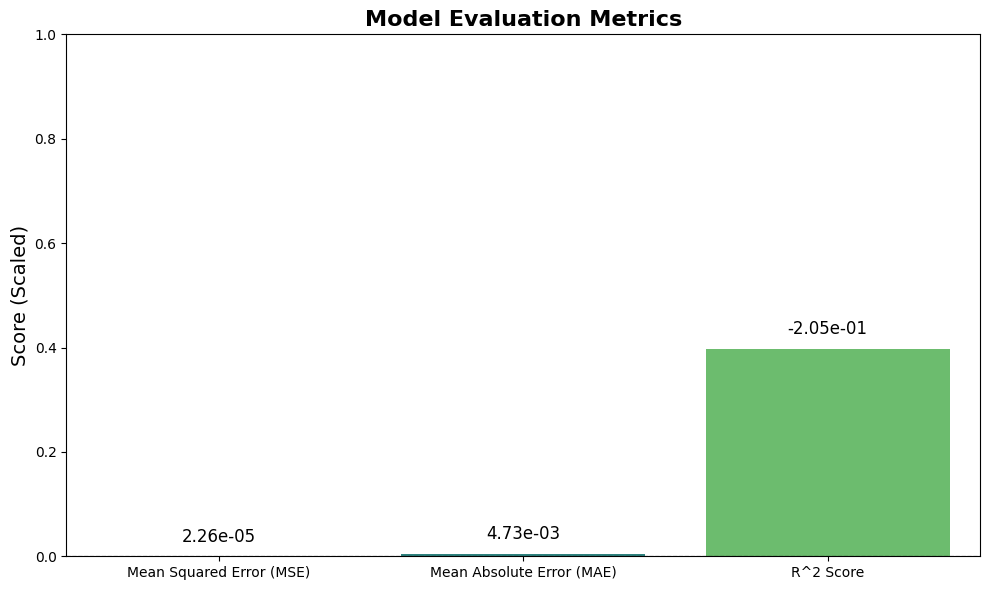

In [56]:
metrics = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R^2 Score']
values = [mse, mae, r2]


r2_scaled = (r2 + 1) / 2
values_scaled = [mse, mae, r2_scaled]


plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values_scaled, palette='viridis')


for i, value in enumerate(values_scaled):
    plt.text(i, value + 0.02, f"{values[i]:.2e}", ha='center', va='bottom', fontsize=12)


plt.title('Model Evaluation Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score (Scaled)', fontsize=14)
plt.ylim(0, 1)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')


plt.tight_layout()
plt.show()


<ipython-input-59-fcd225bec9ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[mse], y=['Mean Squared Error (MSE)'], palette='Blues', ax=axes[0])
<ipython-input-59-fcd225bec9ae>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[mae], y=['Mean Absolute Error (MAE)'], palette='Oranges', ax=axes[1])
<ipython-input-59-fcd225bec9ae>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[r2], y=['R^2 Score'], palette='Reds', ax=axes[2])


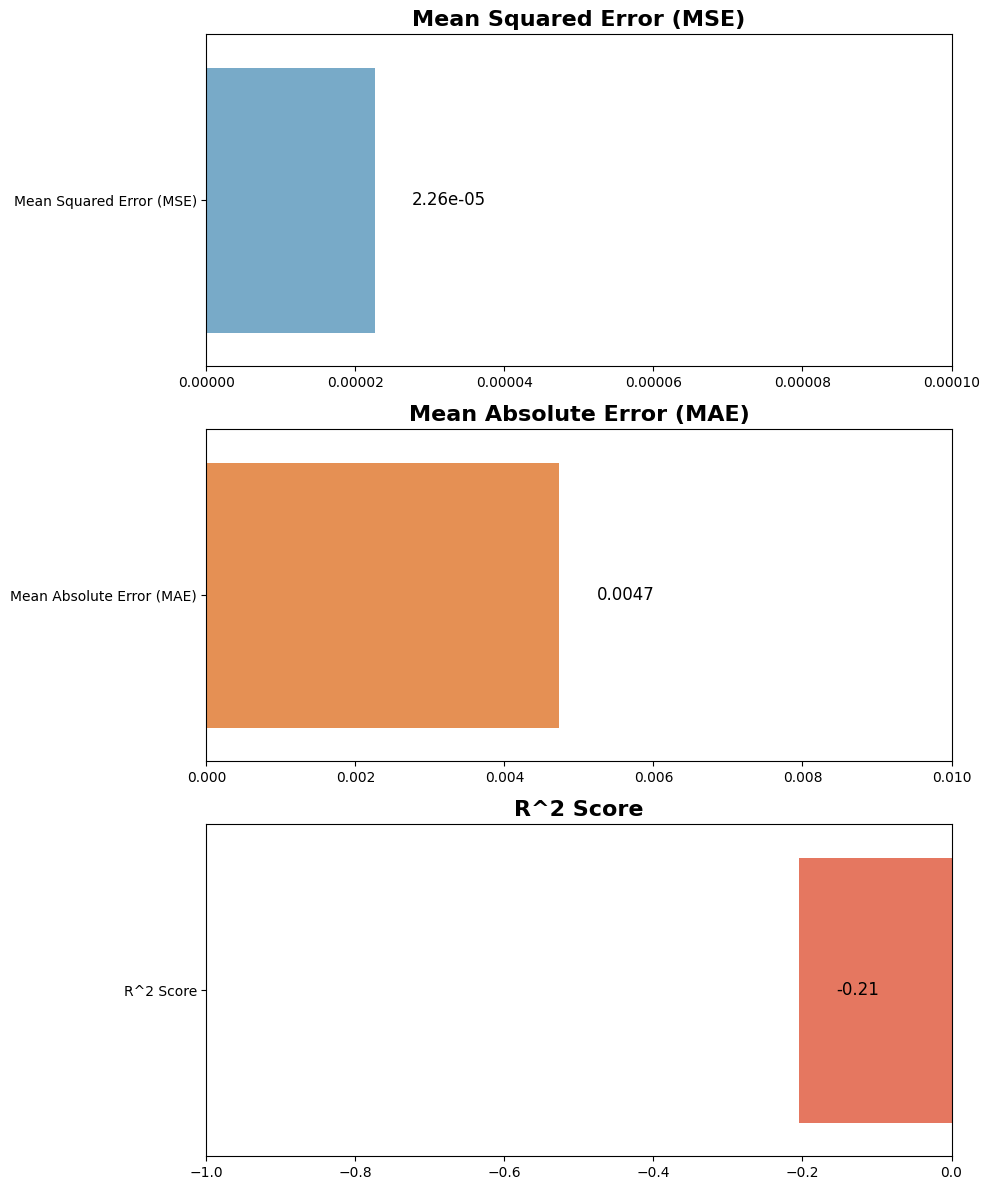

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))


sns.barplot(x=[mse], y=['Mean Squared Error (MSE)'], palette='Blues', ax=axes[0])
axes[0].set_xlim(0, 0.0001)
axes[0].set_title('Mean Squared Error (MSE)', fontsize=16, fontweight='bold')
axes[0].text(mse + 0.000005, 0, f"{mse:.2e}", ha='left', va='center', fontsize=12)


sns.barplot(x=[mae], y=['Mean Absolute Error (MAE)'], palette='Oranges', ax=axes[1])
axes[1].set_xlim(0, 0.01)
axes[1].set_title('Mean Absolute Error (MAE)', fontsize=16, fontweight='bold')
axes[1].text(mae + 0.0005, 0, f"{mae:.4f}", ha='left', va='center', fontsize=12)


sns.barplot(x=[r2], y=['R^2 Score'], palette='Reds', ax=axes[2])
axes[2].set_xlim(-1, 0)
axes[2].set_title('R^2 Score', fontsize=16, fontweight='bold')
axes[2].text(r2 + 0.05, 0, f"{r2:.2f}", ha='left', va='center', fontsize=12)


plt.tight_layout()
plt.show()
